Import all relevant libraries

In [4]:
import os
import tsfel
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Loading and preparing the data // sample

In [5]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())

dfs_master = []

# Load your dataset
action_types = ['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
csv_directory = []
for action in action_types:
    csv_directory = csv_directory + [os.path.join(path_now,"Combined","train", action)]

# print(csv_directory[0])
action_freq = [0,0,0,0,0,0]



for i in range(6):
    dfs_temp = []
    for filename in os.listdir(csv_directory[i]):
        filepath = os.path.join(csv_directory[i], filename)
        # print(filepath)
        # Read the CSV file
        df = pd.read_csv(filepath, delimiter=',')
        
        # Append the DataFrame to the list
        
        dfs_temp.append(df)
        # print(df)
        # print(dfs_temp)
        
        # Optionally, print the filename to confirm processing
        # print(f"Processed: {filename}")
    
    to_add_pd = pd.concat(dfs_temp, ignore_index=True)
    dfs_master.append(to_add_pd)
    action_freq[i] = to_add_pd.shape[0]
    
    

print(action_freq)

[90048, 87936, 82304, 78464, 68672, 63104]


In [3]:
sampling_freq = 50
windowsize = 50

# Get the default configuration for feature extraction
cfg = tsfel.get_features_by_domain()

features = []
# Extract features from the time series data

for i in range(6):
    feature_temp = tsfel.time_series_features_extractor(cfg, dfs_master[i], fs = sampling_freq, window_size= windowsize)   
    features.append(feature_temp) 
    print(f"feature extraction for activity {action_types[i]} done")



*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity LAYING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity STANDING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity SITTING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity WALKING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity WALKING_UPSTAIRS done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity WALKING_DOWNSTAIRS done


Let's look at all the features

In [6]:
for i in range(6):
    print(features[i].shape[0])

1800
1758
1646
1569
1373
1262


y labels

In [7]:
y_label = []
for i in range(6):
    y_label = y_label + [action_types[i]] * features[i].shape[0]

# Create the DataFrame
df_y_label = pd.DataFrame({'y_train': y_label})

print(df_y_label)

                 y_train
0                 LAYING
1                 LAYING
2                 LAYING
3                 LAYING
4                 LAYING
...                  ...
9403  WALKING_DOWNSTAIRS
9404  WALKING_DOWNSTAIRS
9405  WALKING_DOWNSTAIRS
9406  WALKING_DOWNSTAIRS
9407  WALKING_DOWNSTAIRS

[9408 rows x 1 columns]


Lets make a comined DF for X values

In [8]:
combined_df = pd.concat(features, ignore_index=True)


In [9]:
print(combined_df)

print(combined_df.shape[0])

      accx_Absolute energy  accx_Area under the curve  accx_Autocorrelation  \
0                 1.740795                   0.182943                   2.0   
1                 1.754540                   0.183586                   2.0   
2                 1.763640                   0.184027                   2.0   
3                 1.769650                   0.184353                   2.0   
4                 1.767129                   0.184191                   2.0   
...                    ...                        ...                   ...   
9403             52.803378                   0.945066                   3.0   
9404             54.498690                   0.960890                   3.0   
9405             50.640850                   0.917232                   3.0   
9406             60.361175                   1.006743                   3.0   
9407             50.686238                   0.926049                   3.0   

      accx_Average power  accx_Centroid  accx_ECDF 

Test using Train data only to verify

In [10]:
from sklearn.tree import DecisionTreeClassifier
n = 8
# Without setting random_state
clf1 = DecisionTreeClassifier(max_depth = n, random_state= 43)
clf1.fit(combined_df, df_y_label)


DecisionTreeClassifier(max_depth=8, random_state=43)

Now, Test and Predict , but wait, we are using the Train Set

Accuracy: 0.9456
Precision: 0.9458
Recall: 0.9456

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1800
           SITTING       0.94      0.95      0.95      1646
          STANDING       0.95      0.95      0.95      1758
           WALKING       0.90      0.94      0.92      1569
WALKING_DOWNSTAIRS       0.93      0.90      0.91      1262
  WALKING_UPSTAIRS       0.93      0.92      0.92      1373

          accuracy                           0.95      9408
         macro avg       0.94      0.94      0.94      9408
      weighted avg       0.95      0.95      0.95      9408



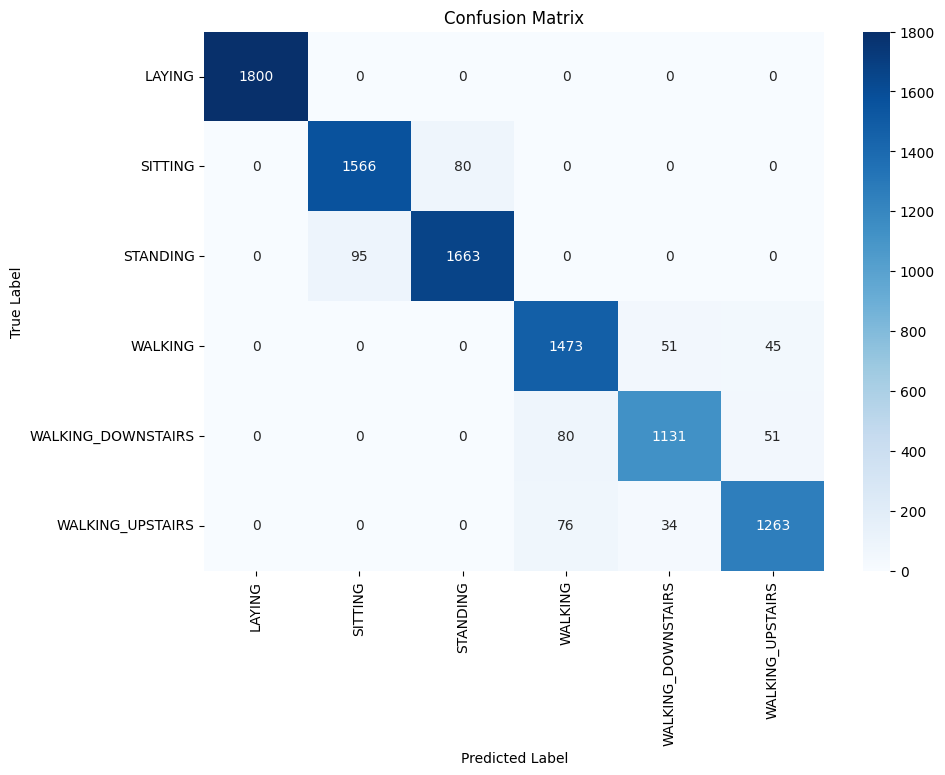

In [11]:
# Predict the test set
y_pred = clf1.predict(combined_df)

# Calculate accuracy
accuracy = accuracy_score(df_y_label, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label, y_pred, average='weighted')
recall = recall_score(df_y_label, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Making of Test Samples

In [17]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())


dfs_test = []
# # Load your dataset
action_types = ['WALKING_UPSTAIRS','LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING']
# csv_directory = []
# for action in action_types:
#     for i in range(6):
#         csv_directory = csv_directory + [os.path.join(path_now,"Task4", "Data_New","Data_New")] #,action+"_"+str(i+1))]

csv_directory = os.path.join(path_now,"Task4", "Data_New","Data_New")
print(len(csv_directory))
action_freq_test = []

sum_freq = []
for filename in os.listdir(csv_directory):
    # print(filename)
    # print(csv_directory)
    filepath = os.path.join(csv_directory, filename)
    # print(filepath)
    # Read the CSV file
    df = pd.read_csv(filepath, delimiter=',')
    df = df.drop('TgF', axis = 1)
    df = df.drop('time', axis = 1)
    # print(df)
    df.columns = ['accx', 'accy', 'accz']
    # print(df)
    # Append the DataFrame to the list
    dfs_test.append(df)

    # Optionally, print the filename to confirm processing
    # print(f"Processed test: {filename}")
    # print(len(df))
    sum_freq = sum_freq + [len(df)]

 
# print(sum_freq)

for i in range(0, len(sum_freq), 6):
    # Sum the current chunk of 6 elements and append the sum to the new list
    chunk_sum = sum(sum_freq[i:i+6])
    action_freq_test.append(chunk_sum)

# print(action_freq_test)

df_master_test = [dfs_test[0:6],dfs_test[6:12],dfs_test[12:18],dfs_test[18:24],dfs_test[24:30],dfs_test[30:36]]

df_to_use = []
for i in range(6):
    df_to_use =  df_to_use + [pd.concat(df_master_test[i], ignore_index=True)]

print(len(df_to_use))

106
6


In [18]:
sampling_freq = 50
windowsize = 50

# Get the default configuration for feature extraction
cfg = tsfel.get_features_by_domain()

features_test = []
# Extract features from the time series data

for i in range(6):
    feature_temp_test = tsfel.time_series_features_extractor(cfg, df_to_use[i], fs = sampling_freq, window_size= windowsize)   
    features_test.append(feature_temp_test) 
    print(f"feature extraction for activity {action_types[i]} done")



*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity WALKING_UPSTAIRS done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity LAYING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity SITTING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity STANDING done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity WALKING_DOWNSTAIRS done
*** Feature extraction started ***



*** Feature extraction finished ***
feature extraction for activity WALKING done


In [21]:
combined_df_test = pd.concat(features_test, ignore_index=True)

print(combined_df_test.shape)


(562, 477)


In [20]:
y_label_test = []
for i in range(6):
    y_label_test = y_label_test + [action_types[i]] * features_test[i].shape[0]

# Create the DataFrame
df_y_label_test = pd.DataFrame({'y_train': y_label_test})

print(df_y_label_test)

              y_train
0    WALKING_UPSTAIRS
1    WALKING_UPSTAIRS
2    WALKING_UPSTAIRS
3    WALKING_UPSTAIRS
4    WALKING_UPSTAIRS
..                ...
557           WALKING
558           WALKING
559           WALKING
560           WALKING
561           WALKING

[562 rows x 1 columns]


In [22]:
print(combined_df_test.shape)
print(df_y_label_test.shape)

print(combined_df.shape)
print(df_y_label.shape)

(562, 477)
(562, 1)
(9408, 477)
(9408, 1)


PREDICT ON TRAIN SET

depth: 8
Accuracy: 0.5605
Precision: 0.6109
Recall: 0.5605

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       103
           SITTING       0.50      1.00      0.67       105
          STANDING       0.54      0.22      0.31        92
           WALKING       0.43      0.73      0.54        93
WALKING_DOWNSTAIRS       0.08      0.04      0.05        77
  WALKING_UPSTAIRS       1.00      0.17      0.30        92

          accuracy                           0.56       562
         macro avg       0.59      0.53      0.48       562
      weighted avg       0.61      0.56      0.50       562



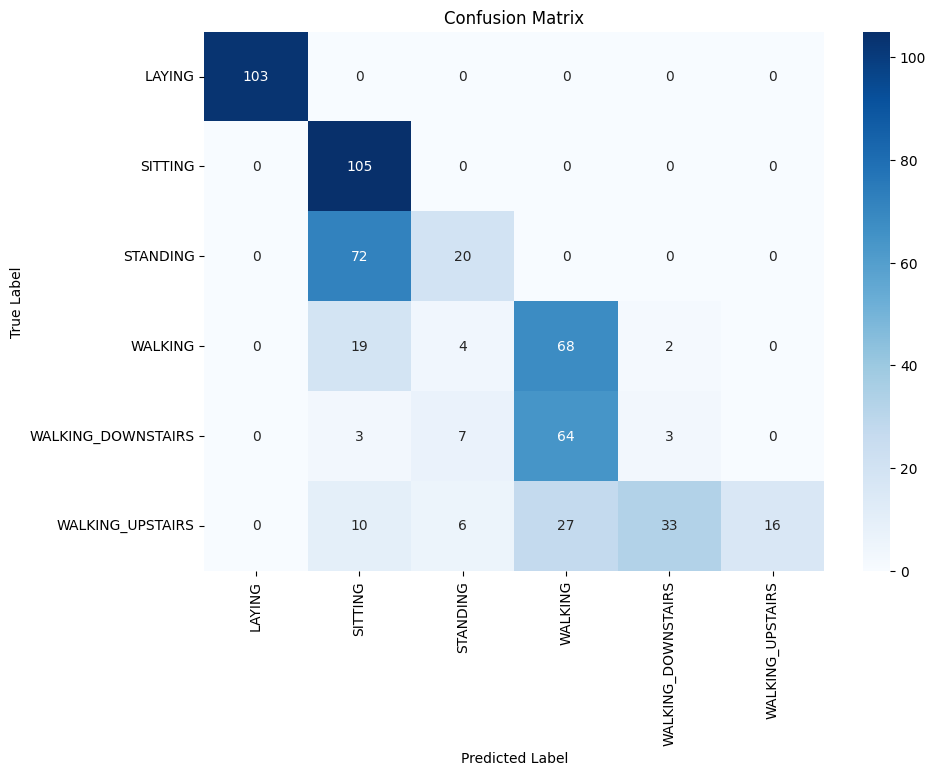

In [23]:
# Predict the test set
y_pred = clf1.predict(combined_df_test)

# Calculate accuracy
accuracy = accuracy_score(df_y_label_test, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label_test, y_pred, average='weighted')
recall = recall_score(df_y_label_test, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label_test, y_pred)

# Display the metrics
print(f"depth: {n}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


REPORT

depth: 2   
Accuracy: 0.5311   
Precision: 0.3364   
Recall: 0.5311      
   
depth: 3   
Accuracy: 0.7078   
Precision: 0.6623   
Recall: 0.7078   
   
depth: 4    
Accuracy: 0.7834   
Precision: 0.7988   
Recall: 0.7834     
  
depth: 5   
Accuracy: 0.8113   
Precision: 0.8111   
Recall: 0.8113     
  
depth: 6  
Accuracy: 0.8079   
Precision: 0.8179   
Recall: 0.8079   
   
depth: 7   
Accuracy: 0.8156   
Precision: 0.8197   
Recall: 0.8156   
   
depth: 8   
Accuracy: 0.8227   
Precision: 0.8242   
Recall: 0.8227   